In [5]:
import numpy as np
import numpy as np
import scipy.integrate
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Steady state concentrations
def A(k1, k2):
    return k2 / k1


def B(X0, k1, k2, k3, k4):
    numerator = (k1 * X0 - k2) * (k3 * k4)
    denominator = k1 * (k3 * k4 + k2 * k4 + k2 * k3)
    return numerator / denominator


def C(X0, k1, k2, k3, k4):
    numerator = (k1 * X0 - k2) * (k2 * k4)
    denominator = k1 * (k3 * k4 + k2 * k4 + k2 * k3)
    return numerator / denominator


def D(X0, k1, k2, k3, k4):
    numerator = (k1 * X0 - k2) * (k3 * k2)
    denominator = k1 * (k3 * k4 + k2 * k4 + k2 * k3)
    return numerator / denominator


def compute_steady_state_concentrations(X0, k1, k2, k3, k4):
    A_ = A(k1, k2)
    B_ = B(X0, k1, k2, k3, k4)
    C_ = C(X0, k1, k2, k3, k4)
    D_ = D(X0, k1, k2, k3, k4)
    return A_, B_, C_, D_

In [14]:
compute_steady_state_concentrations(X0, k1, k2, k3, k4)

(2.0, 5.076923076923077, 3.384615384615385, 2.5384615384615383)

In [15]:
def dydt(t, y, k1, k2, k3, k4):
    A, B, C, D = y
    dAdt = k4 * D - k1 * A * B
    dBdt = k1 * A * B - k2 * B
    dCdt = k2 * B - k3 * C
    dDdt = k3 * C - k4 * D
    return (dAdt, dBdt, dCdt, dDdt)


def euler(dydt, time_interval, y0, k1, k2):
    Y = [y0]
    dt = 0.001  # integration step
    t_start = time_interval[0]
    t_max = time_interval[1]
    T = [t_start]
    while t_start <= t_max:
        Y.append(Y[-1] + np.multiply(dt, dydt(t_start, Y[-1], k1, k2)))
        t_start = t_start + dt
        T.append(t_start)

    return (T, Y)

In [16]:
def dydt_withks(t, y):
    return dydt(t, y, k1, k2, k3, k4)

In [21]:
start = timer()
solution = scipy.integrate.solve_ivp(
    dydt_withks, t_span=(0, 15), y0=(A0, B0, C0, D0), method="RK45", rtol=1e-6
)
end = timer()
time_for_num_int_by_ode45 = end - start
print("time for ODE45, ", time_for_num_int_by_ode45)

t_ode45 = solution.t
A_ode45 = solution.y[0]
B_ode45 = solution.y[1]
C_ode45 = solution.y[2]
D_ode45 = solution.y[3]
print("Equilibrium points of A, B, C, D")
print(A_ode45[-1], B_ode45[-1], C_ode45[-1], D_ode45[-1])

time for ODE45,  0.004146583960391581
Equilibrium points of A, B, C, D
2.009660851358248 4.998601387666667 3.413273329499513 2.578464431475572


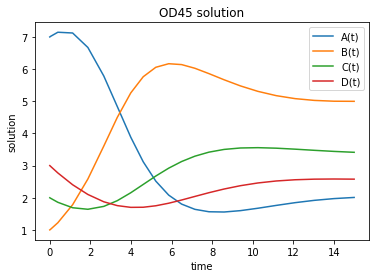

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_ode45, (A_ode45), color="tab:blue", label="A(t)")
ax.plot(t_ode45, (B_ode45), color="tab:orange", label="B(t)")
ax.plot(t_ode45, (C_ode45), color="tab:green", label="C(t)")
ax.plot(t_ode45, (D_ode45), color="tab:red", label="D(t)")
ax.set_title("OD45 solution")
ax.set_xlabel("time")
ax.set_ylabel("solution")
ax.legend()
plt.show()